<a href="https://colab.research.google.com/github/OrganicSpector/dbproject/blob/master/(HW3)Classical_Logic_Gates_with_Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Logic Gates with quantum circuits

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=86168fc42ac93b983cb3e931e4be01236595c505afc0512be3a3315aebfd0a98
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.1 MB/s eta 0:00:00


In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit_aer import AerSimulator

Using the NOT gate (expressed as x in Qiskit), the CNOT gate (expressed as cx in Qiskit) and the Toffoli gate (expressed as ccx in Qiskit) create functions to implement the XOR, AND, NAND, OR and FANOUT gates.

([This example](https://learn.qiskit.org/course/introduction/the-atoms-of-computation#the-11-2) can be helpful).

An implementation of the NOT gate is provided as an example.


## NOT gate
This function takes a binary string input ('0' or '1') and returns the opposite binary output'.

In [ ]:
def NOT(input):

    q = QuantumRegister(1) # a qubit in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes

    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if input=='1':
        qc.x( q[0] )

    # Now we've encoded the input, we can do a NOT on it using x
    qc.x( q[0] )

    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure( q[0], c[0] )
    display(qc.draw(output='mpl'))
    # We'll run the program on a simulator
    simulator = AerSimulator() # create simulator object
    qc = transpile(qc, simulator)

    # Since the output will be deterministic, we can use just a single shot to get it
    job = simulator.run(qc, shots=1)
    output = next(iter(job.result().get_counts()))


    return output

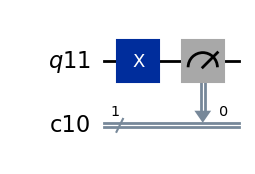

'1'

In [ ]:
NOT('0')

## XOR gate
Takes two binary strings as input and gives one as output.

The output is '0' when the inputs are equal and '1' otherwise.

In [ ]:
def XOR(input1, input2):

    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes

    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])

    qc.cx(q[0], q[1])

    qc.measure(q[1], c[0])
    display(qc.draw(output='mpl'))


    # We'll run the program on a simulator
    simulator = AerSimulator() # create simulator object
    qc = transpile(qc, simulator)
    # Since the output will be deterministic, we can use just a single shot to get it
    job = simulator.run(qc, shots=1,memory=True)
    output = job.result().get_memory()[0]

    return output

## AND gate
Takes two binary strings as input and gives one as output.

The output is '1' only when both the inputs are '1'.

In [ ]:
def AND(input1,input2):

    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes

    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    qc.ccx(q[0], q[1], q[2])


    qc.measure(q[2], c[0])
    display(qc.draw(output='mpl'))

    # We'll run the program on a simulator
    simulator = AerSimulator() # create simulator object
    qc = transpile(qc, simulator)
    # Since the output will be deterministic, we can use just a single shot to get it
    job = simulator.run(qc, shots=1,memory=True)
    output = job.result().get_memory()[0]

    return output

## NAND gate
Takes two binary strings as input and gives one as output.

The output is '0' only when both the inputs are '1'.

In [ ]:
def NAND(input1,input2):

    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    qc.ccx(q[0], q[1], q[2])
    qc.x(q[2])
    qc.measure(q[2], c[0])
    display(qc.draw(output='mpl'))


    # We'll run the program on a simulator
    simulator = AerSimulator() # create simulator object
    qc = transpile(qc, simulator)
    # Since the output will be deterministic, we can use just a single shot to get it
    job = simulator.run(qc, shots=1,memory=True)
    output = job.result().get_memory()[0]

    return output

## OR gate
Takes two binary strings as input and gives one as output.

The output is '1' if either input is '1'.

In [ ]:
def OR(input1, input2):

    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes

    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    qc.x(q[0])
    qc.x(q[1])
    qc.ccx(q[0], q[1], q[2])
    qc.x(q[2])
    qc.measure(q[2], c[0])


    qc.measure(q[2], c[0]) # output from qubit 1 is measured

    # We'll run the program on a simulator
    simulator = AerSimulator() # create simulator object
    qc = transpile(qc, simulator)
    # Since the output will be deterministic, we can use just a single shot to get it
    job = simulator.run(qc, shots=1,memory=True)
    output = job.result().get_memory()[0]

    return output

## FANOUT gate

Takes one binary string as input and gives two copies as output.

In [ ]:
def FANOUT(input):

    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(3) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    if input == '1':
        qc.x(q[0])
    qc.cx(q[0], q[0])
    qc.cx(q[0], q[1])
    qc.cx(q[0], q[2])
    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])
    qc.measure(q[2], c[2])

    # We'll run the program on a simulator
    simulator = AerSimulator() # create simulator object
    qc = transpile(qc, simulator)
    # Since the output will be deterministic, we can use just a single shot to get it
    job = simulator.run(qc, shots=1,memory=True)
    output = job.result().get_memory()[0]

    return output

## Tests
The following code runs the functions above for all possible inputs, so that you can check whether they work.


Results for the NOT gate


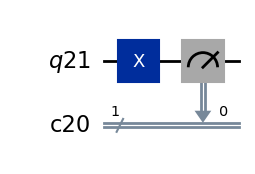

    Input 0 gives output 1


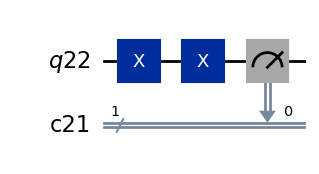

    Input 1 gives output 0

Results for the XOR gate


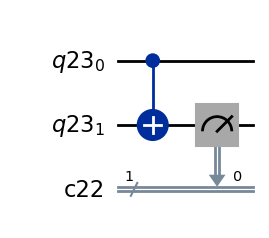

    Inputs 0 0 give output 0


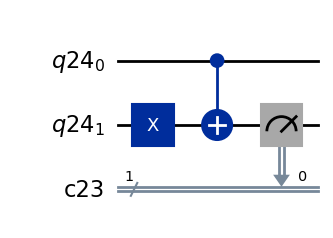

    Inputs 0 1 give output 1


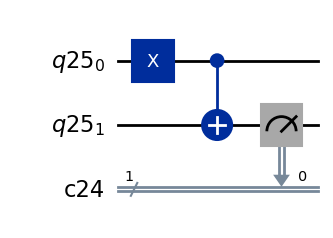

    Inputs 1 0 give output 1


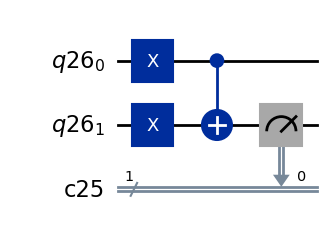

    Inputs 1 1 give output 0

Results for the AND gate


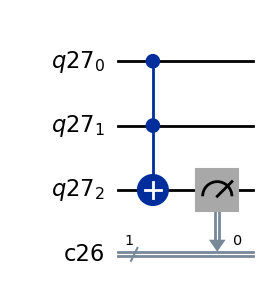

    Inputs 0 0 give output 0


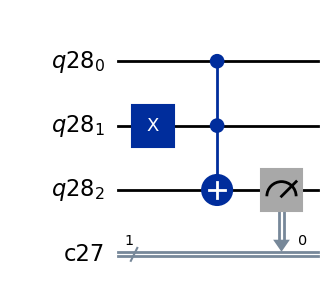

    Inputs 0 1 give output 0


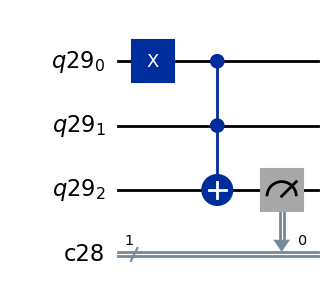

    Inputs 1 0 give output 0


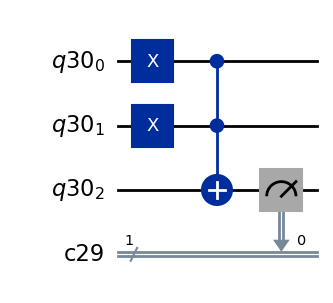

    Inputs 1 1 give output 1

Results for the NAND gate


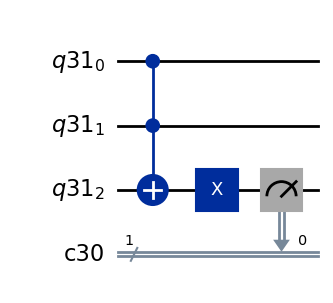

    Inputs 0 0 give output 1


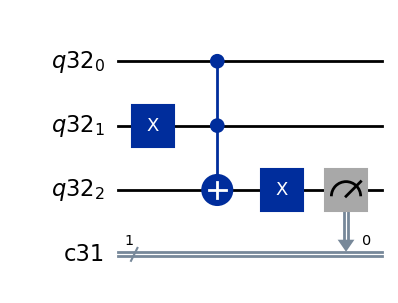

    Inputs 0 1 give output 1


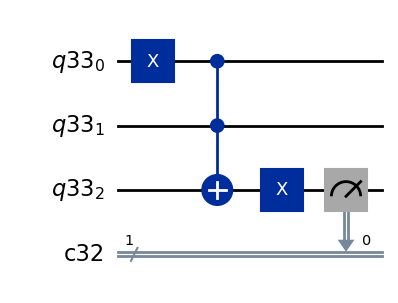

    Inputs 1 0 give output 1


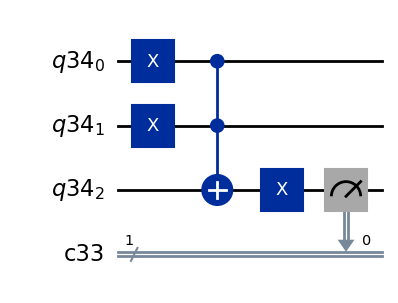

    Inputs 1 1 give output 0

Results for the OR gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 1

Results for the FANOUT gate
    Inputs 0 gives output 000
    Inputs 1 gives output 011


In [ ]:
print('\nResults for the NOT gate')
for input in ['0','1']:
    print('    Input',input,'gives output',NOT(input))

print('\nResults for the XOR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',XOR(input1,input2))

print('\nResults for the AND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',AND(input1,input2))

print('\nResults for the NAND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',NAND(input1,input2))

print('\nResults for the OR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',OR(input1,input2))

print('\nResults for the FANOUT gate')
for input in ['0','1']:
    print('    Inputs',input,'gives output',FANOUT(input))

In [ ]:
import qiskit
qiskit.__qiskit_version__

AttributeError: module 'qiskit' has no attribute '__qiskit_version__'